In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from datetime import * 

In [3]:
import folium

# EDA

In [4]:
df = pd.read_csv('df_train_dust.csv')
df

,시리얼번호,전송시간,미세먼지,위도,경도
0,OC3CL200012,2022-01-01 00:00:00,11.0,37.544002,127.069731
1,OC3CL200012,2022-01-01 01:00:00,13.0,37.544002,127.069731
2,OC3CL200012,2022-01-01 02:00:00,15.5,37.544002,127.069731
3,OC3CL200012,2022-01-01 03:00:00,18.0,37.544002,127.069731
4,OC3CL200012,2022-01-01 04:00:00,13.0,37.544002,127.069731
...,...,...,...,...,...
1434235,V02Q1941013,2022-03-31 19:00:00,0.0,37.524531,126.855007
1434236,V02Q1941013,2022-03-31 20:00:00,0.0,37.524531,126.855007
1434237,V02Q1941013,2022-03-31 21:00:00,0.0,37.524531,126.855007
1434238,V02Q1941013,2022-03-31 22:00:00,0.0,37.524531,126.855007


In [5]:
meta = pd.read_excel('./data/sdot_data/dust_location_meta.xlsx', sheet_name=1, header=3)
meta = meta.iloc[2:,1:9]
meta1 = meta[['시리얼번호','자치구']]
df1 = pd.merge(df, meta1, on=['시리얼번호'], how='left')
df1

,시리얼번호,전송시간,미세먼지,위도,경도,자치구
0,OC3CL200012,2022-01-01 00:00:00,11.0,37.544002,127.069731,광진구
1,OC3CL200012,2022-01-01 01:00:00,13.0,37.544002,127.069731,광진구
2,OC3CL200012,2022-01-01 02:00:00,15.5,37.544002,127.069731,광진구
3,OC3CL200012,2022-01-01 03:00:00,18.0,37.544002,127.069731,광진구
4,OC3CL200012,2022-01-01 04:00:00,13.0,37.544002,127.069731,광진구
...,...,...,...,...,...,...
1434235,V02Q1941013,2022-03-31 19:00:00,0.0,37.524531,126.855007,양천구
1434236,V02Q1941013,2022-03-31 20:00:00,0.0,37.524531,126.855007,양천구
1434237,V02Q1941013,2022-03-31 21:00:00,0.0,37.524531,126.855007,양천구
1434238,V02Q1941013,2022-03-31 22:00:00,0.0,37.524531,126.855007,양천구


In [6]:
df1['시리얼번호'].nunique()

664

In [7]:
round(pd.DataFrame(df1['미세먼지'].describe()).T, 3)

,count,mean,std,min,25%,50%,75%,max
미세먼지,1434240.0,29.972,25.603,0.0,13.0,23.0,40.0,1000.0


In [11]:
map_osm = folium.Map(location=[40.734695, -73.990372])

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = map_train_ny.head(500)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)

map_osm

NameError: name 'map_train_ny' is not defined

Text(0, 0.5, 'latitude')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


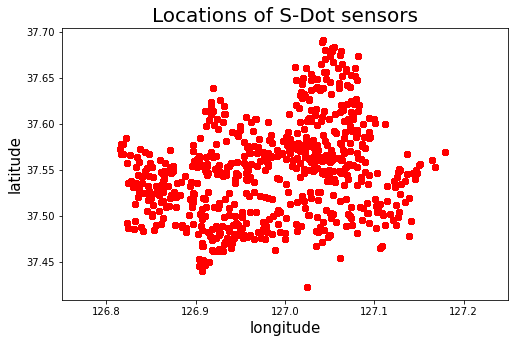

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(df1['경도'],df1['위도'], color='red')
plt.title('Locations of S-Dot sensors', fontsize=20)
plt.xlim(126.75,127.25)
plt.xlabel('longitude', fontsize=15)
plt.ylabel('latitude', fontsize=15)

In [32]:
m = folium.Map(location=[37.58, 127.0], tiles='openstreetmap', zoom_start=11)

# Add  points to the map
for _, row in meta.dropna().iterrows():
    folium.Circle(location = [row['위도'], row['경도']],
           radius = 200,
                  color='red'
#            popup=row['시설명'],
    ).add_to(m)
    

# Display the map
m

In [13]:
df1['전송시간'] = pd.to_datetime(df1['전송시간'])
df1['요일'] = df1['전송시간'].dt.dayofweek
df1['시간'] = df1['전송시간'].dt.hour

# 0 => 월
# 1 => 화
# 2 => 수
# 3 => 목
# 4 => 금
# 5 => 토요일
# 6 => 일

Text(0.5, 1.0, 'Average fine dust concentration by day-of-week')

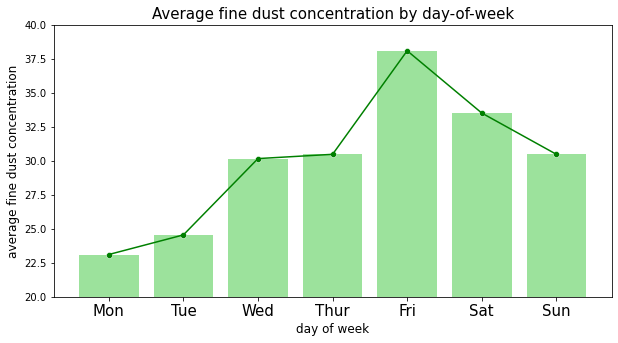

In [32]:
df_dayofweek = df1.groupby('요일').mean().reset_index()
# display(df_dayofweek)

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='요일', y='미세먼지', data=df_dayofweek, ax=ax, color='lightgreen')
sns.lineplot(x='요일', y='미세먼지', data=df_dayofweek, ax=ax, color='green')
sns.scatterplot(x='요일', y='미세먼지', data=df_dayofweek, ax=ax, color='green')

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'], fontsize=15)
ax.set(ylim=(20, 40))

ax.set_xlabel('day of week', fontsize=12)
ax.set_ylabel('average fine dust concentration', fontsize=12)
ax.set_title('Average fine dust concentration by day-of-week', fontsize=15)

Text(0.5, 1.0, 'Average fine dust concentration by Hour-of-day')

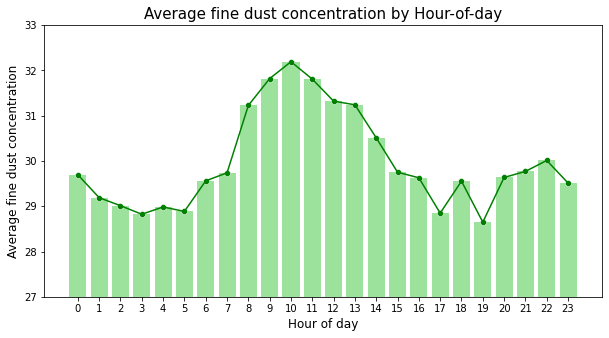

In [30]:
df_hour = df1.groupby('시간').mean().reset_index()

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='시간', y='미세먼지', data=df_hour, ax=ax, color='lightgreen')
sns.lineplot(x='시간', y='미세먼지', data=df_hour, ax=ax, color='green')
sns.scatterplot(x='시간', y='미세먼지', data=df_hour, ax=ax, color='green')

ax.set_xticks(range(24))
ax.set(ylim=(27, 33))
ax.set_xlabel('Hour of day', fontsize=12)
ax.set_ylabel('Average fine dust concentration', fontsize=12)
ax.set_title('Average fine dust concentration by Hour-of-day', fontsize=15)

Text(0.5, 1.0, 'Timeseries plot of fine dust concentration')

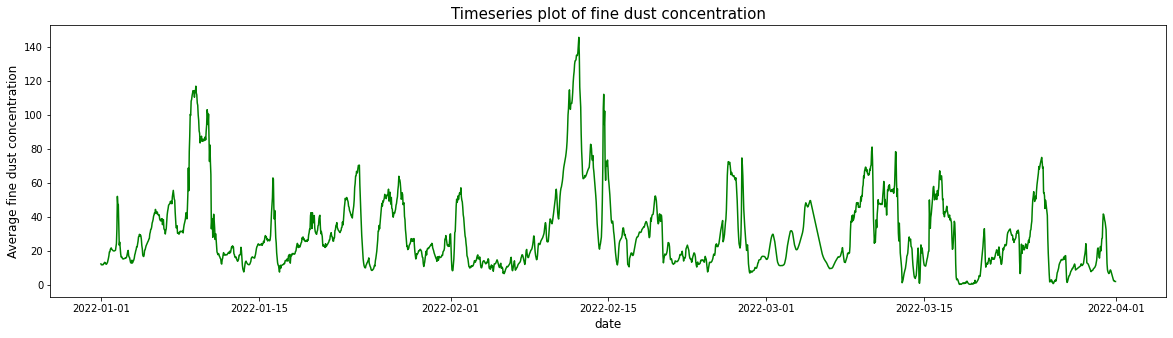

In [94]:
df_all = df1.groupby(['전송시간']).mean().reset_index()

fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x='전송시간', y='미세먼지', data=df_all, ax=ax, color='green')
# ax.set_xticks(range(24))
ax.set_xlabel('date', fontsize=12)
ax.set_ylabel('Average fine dust concentration', fontsize=12)
ax.set_title('Timeseries plot of fine dust concentration', fontsize=15)

KeyboardInterrupt: 

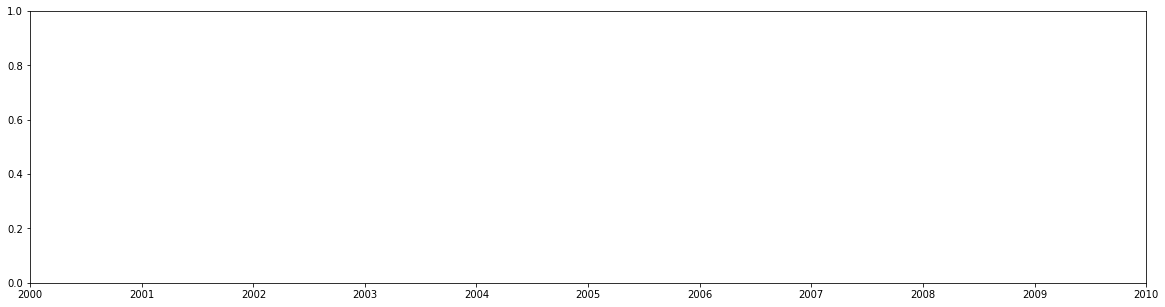

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='시간', y='미세먼지', data=df_hour, ax=ax, color='green')
ax.set_xticks(range(24))
ax.set_xlabel('Hour of day', fontsize=12)
ax.set_ylabel('Average fine dust concentration', fontsize=12)
ax.set_title('Average fine dust concentration by Hour-of-day', fontsize=15)

Text(0.5, 1.0, 'V02Q1940741')

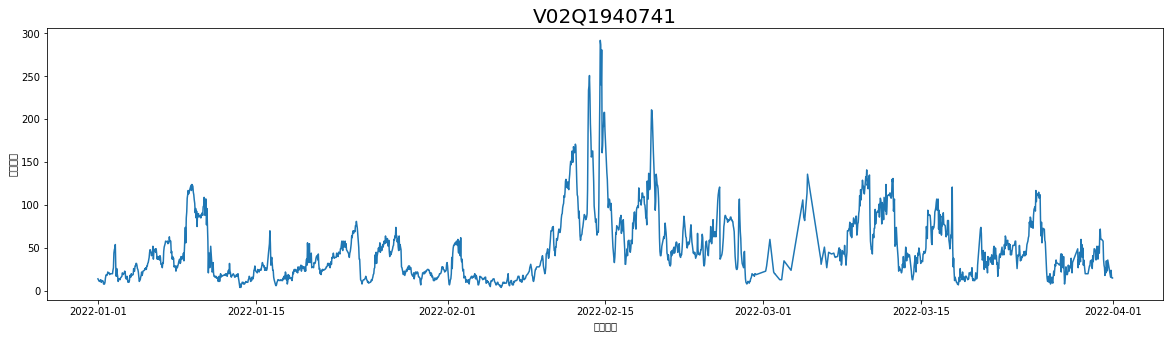

In [15]:
# 평균 미세먼지 농도 가장 높은 지역
site='V02Q1940741'
temp = df1[df1['시리얼번호']==site]
plt.figure(figsize=(20,5))
sns.lineplot(x='전송시간', y='미세먼지', data=temp)
plt.title(site, fontsize=20)

Text(0.5, 1.0, 'V02Q1940941')

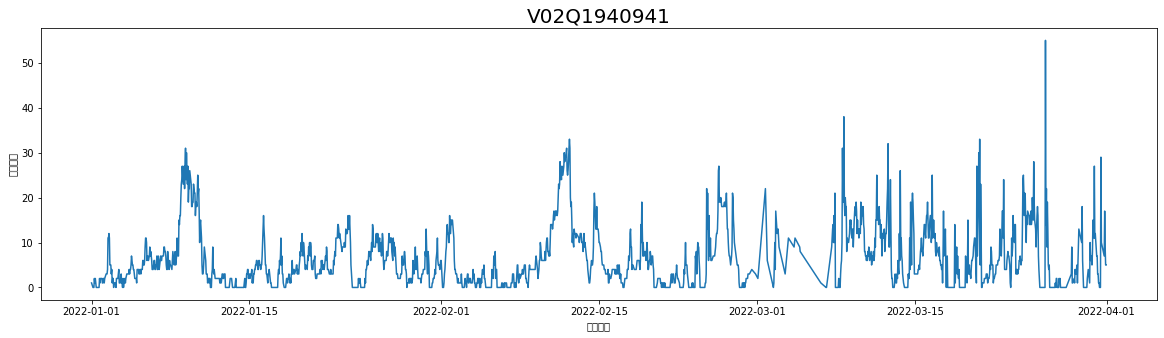

In [16]:
# 평균 미세먼지 농도 가장 낮은 지역
site='V02Q1940941'
temp = df1[df1['시리얼번호']==site]
plt.figure(figsize=(20,5))
sns.lineplot(x='전송시간', y='미세먼지', data=temp)
plt.title(site, fontsize=20)

In [16]:
c = 10 ; vmax = 100

for i in range(0,,6):
    fig = plt.figure(figsize=(20,10))
    target = datetime(2022,1,1,0,0) + timedelta(hours=i)

    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(train_image[i][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
    ax1.set_title(f'{str(target)}', fontsize=15)
    
    plt.show()
    

SyntaxError: invalid syntax (1658602162.py, line 3)

In [ ]:
STAMP=1 ; LAG=2 ; STEP=1
single_step_forecast(STAMP, LAG, STEP)